Importing the required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
from torchvision import datasets
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time

Importing the dataset

In [ ]:
fmnist_trainset = torchvision.datasets.FashionMNIST(root='./',train=True, download=True)
fmnist_testset = torchvision.datasets.FashionMNIST(root='./',train=False, download=True)

Organizing the data into arrays, so that it can be fitted into the SVM model

In [3]:
X_train = fmnist_trainset.data
y_train = fmnist_trainset.targets
X_test = fmnist_testset.data
y_test = fmnist_testset.targets

In [4]:
X_train= np.array(X_train).reshape(len(X_train),-1)
X_test= np.array(X_test).reshape(len(X_test),-1)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
parameters1 = {'C':[0.00001, 0.0001, 0.001, 0.01,1, 0.1, 10, 100, 1000]}
linearSVM = SVC(kernel='linear')
linearclf = GridSearchCV(linearSVM, parameters1,n_jobs=-1, cv = 3)
linearclf.fit(X_train, y_train)
print(linearclf.best_params_)

parameters2 = {'gamma':[0.0001, 0.0001, 0.001, 0.01,1, 0.1, 10, 100, 1000],'coef0':[0.0001,0.001,0.01,0.1,1,10,100,1000], 'degree':[1,2,3,4]}
polySVM = SVC(kernel='poly')
polyclf = GridSearchCV(polySVM, parameters2,n_jobs=-1, cv = 3)
polyclf.fit(X_train, y_train)
print(polyclf.best_params_)

parameters3 = {'gamma':[0.0001, 0.0001, 0.001, 0.01,1, 0.1, 10, 100, 1000],'coef0':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
sigmSVM = SVC(kernel='sigmoid')
sigmclf = GridSearchCV(sigmSVM, parameters3,n_jobs=-1, cv = 3)
sigmclf.fit(X_train, y_train)
print(sigmclf.best_params_)

parameters4 = {'gamma':[0.0001, 0.0001, 0.001, 0.01,1, 0.1, 10, 100, 1000]}
rbfSVM = SVC(kernel='rbf')
rbfclf = GridSearchCV(rbfSVM, parameters4,n_jobs=-1, cv = 3)
rbfclf.fit(X_train, y_train)
print(rbfclf.best_params_)

KeyboardInterrupt: ignored

Using the SVM model with a linear kernel, then printing the accuracy and the confusion matrix

In [ ]:
time1 = time.time()
linearSVM = SVC(kernel='linear')
linearSVM.fit(X_train, y_train)
time2 = time.time()
m, s = m, s = divmod(time2-time1, 60)
print("Timp de executie: "+str(m)+'m'+str(s)+'s')

Timp de executie: 30.0m38.661723613739014s


0.837


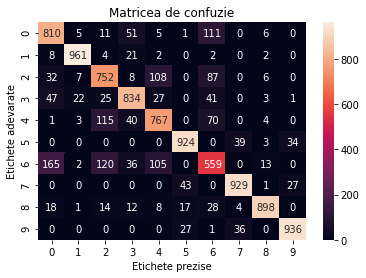

In [ ]:
linear_pred = linearSVM.predict(X_test)
linear_acc = accuracy_score(y_test, linear_pred)
print(linear_acc)
linear_confmat = confusion_matrix(y_test, linear_pred)
sns.heatmap(linear_confmat, annot=True, fmt='g')
plt.title('Matricea de confuzie')
plt.xlabel('Etichete prezise')
plt.ylabel('Etichete adevarate')
plt.show()

Using the SVM model with a polynomial kernel, then printing the accuracy and the confusion matrix

In [ ]:
time1 = time.time()
polySVM = SVC(kernel='poly')
polySVM.fit(X_train, y_train)
time2 = time.time()
m, s = m, s = divmod(time2-time1, 60)
print("Timp de executie: "+str(m)+'m'+str(s)+'s')

Timp de executie: 16.0m20.16973066329956s


0.8755


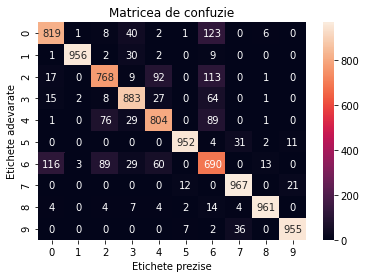

In [ ]:
poly_pred = polySVM.predict(X_test)
poly_acc = accuracy_score(y_test, poly_pred)
print(poly_acc)
poly_confmat = confusion_matrix(y_test, poly_pred)
sns.heatmap(poly_confmat, annot=True, fmt='g')
plt.title('Matricea de confuzie')
plt.xlabel('Etichete prezise')
plt.ylabel('Etichete adevarate')
plt.show()

Using the SVM model with a sigmoid kernel, then printing the accuracy and the confusion matrix

In [ ]:
time1 = time.time()
sigmSVM = SVC(kernel='sigmoid')
sigmSVM.fit(X_train, y_train)
time2 = time.time()
m, s = m, s = divmod(time2-time1, 60)
print("Timp de executie: "+str(m)+'m'+str(s)+'s')

Timp de executie: 10.0m55.72286319732666s


0.7074


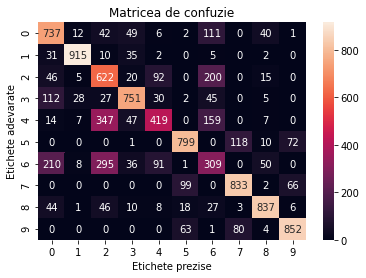

In [ ]:
sigm_pred = sigmSVM.predict(X_test)
sigm_acc = accuracy_score(y_test, sigm_pred)
print(sigm_acc)
sigm_confmat = confusion_matrix(y_test, sigm_pred)
sns.heatmap(sigm_confmat, annot=True, fmt='g')
plt.title('Matricea de confuzie')
plt.xlabel('Etichete prezise')
plt.ylabel('Etichete adevarate')
plt.show()

Using the SVM model with a rbf kernel, then printing the accuracy and the confusion matrix

In [ ]:
time1 = time.time()
rbfSVM = SVC(kernel='rbf')
rbfSVM.fit(X_train, y_train)
time2 = time.time()
m, s = m, s = divmod(time2-time1, 60)
print("Timp de executie: "+str(m)+'m'+str(s)+'s')

Timp de executie: 13.0m27.768605709075928s


0.8836


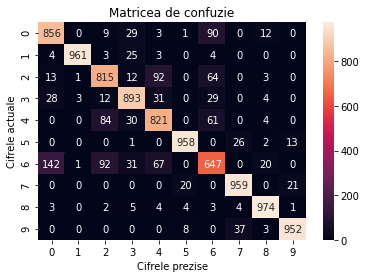

In [ ]:
rbf_pred = rbfSVM.predict(X_test)
rbf_acc = accuracy_score(y_test, rbf_pred)
print(rbf_acc)
rbf_confmat = confusion_matrix(y_test, rbf_pred)
sns.heatmap(rbf_confmat, annot=True, fmt='g')
plt.title('Matricea de confuzie')
plt.xlabel('Cifrele prezise')
plt.ylabel('Cifrele actuale')
plt.show()